In [2]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt 

### Problema 1: Quer se estudar o número de erros de impressão de um livro. Para isso escolheu-se uma amostra de 50 páginas, encontrando-se o número de erros por página da tabela abaixo.

In [3]:
erros = [0, 1, 2, 3, 4]
frequencia = [25, 20, 3, 1, 1]

freq_table = pd.DataFrame(erros, columns=['Erros'])
freq_table['Frequencia'] = frequencia

freq_table

,Erros,Frequencia
0,0,25
1,1,20
2,2,3
3,3,1
4,4,1


In [4]:
paginas = []

for erro, freq in zip(erros, frequencia):
    paginas.extend([erro] * freq)

paginas = pd.DataFrame(paginas, columns=['QtdErrosXPgn'])
paginas

,QtdErrosXPgn
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#### Qual o número médio de erros por página?

In [5]:
#Sem o uso do pandas
media = paginas['QtdErrosXPgn'].sum()/len(paginas)

#Usando o pandas
mediaPd = paginas['QtdErrosXPgn'].mean()

print('Media:', media,' Media usando pandas: ', mediaPd)

Media: 0.66  Media usando pandas:  0.66


#### E o número mediano?

In [6]:
#Sem o uso do Pandas
if len(paginas)%2==0:
    i = int((len(paginas)/2)-1)
    o = i+1
    mediana = (paginas['QtdErrosXPgn'][i] + paginas['QtdErrosXPgn'][o])/ 2
else:
    i = floor(len(paginas['QtdErrosXPgn'])/2)
    mediana = paginas['QtdErrosXPgn'][i]

#Usando o pandas

medianaPd = paginas['QtdErrosXPgn'].median()

print('Mediana:', mediana,' Mediana usando pandas: ', medianaPd)

Mediana: 0.5  Mediana usando pandas:  0.5


#### Qual é o desvio padrão?

##### Sem o uso do pandas

In [7]:
def funcDesvio(valor, media):
    if valor > media:
        return round(valor - media, 3)
    else:
        return round(media - valor, 3) 
    
def funcQuadradoDesvios(valor):
    return round(valor**2, 3)

In [8]:
tamanho = len(paginas)
media = paginas['QtdErrosXPgn'].mean()

desvios = []
quadradoDesvios = []

#Pegando os desvios de cada elemento
for i in paginas['QtdErrosXPgn']:
    desvios.append(funcDesvio(i, media))

#Calculando o desvio medio a partir do desvio
desvioMedio = (sum(desvios))/tamanho

#Pegando o quadrado dos desvios de cada elemento
for i in desvios:
    quadradoDesvios.append(funcQuadradoDesvios(i))
    
#Calculando a variancia a partir do quadrado dos desvios
variancia = round((sum(quadradoDesvios))/tamanho, 3)

#Calculado o desvio Padrao a partir da variância
desvioPadrao = round(mt.sqrt(variancia),2)

print('Desvios:', desvios)
print()
print('Desvio Medio:', desvioMedio)
print()
print('Quadrado dos desvios', quadradoDesvios)
print()
print('Variancia:', variancia)
print()
print('Desvio Padrão:', desvioPadrao)

Desvios: [0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 1.34, 1.34, 1.34, 2.34, 3.34]

Desvio Medio: 0.66

Quadrado dos desvios [0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.436, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 0.116, 1.796, 1.796, 1.796, 5.476, 11.156]

Variancia: 0.705

Desvio Padrão: 0.84


##### Com o pandas

In [9]:
#lista.mad() foi descontinuado
desvioMedio = paginas['QtdErrosXPgn']
desvioMedio = (desvioMedio-desvioMedio.mean()).abs().mean()
print('Desvio Médio:', desvioMedio)

#variância
variancia = round(paginas['QtdErrosXPgn'].var(), 3)
print("Variância:", variancia)

#desvio padrão
desvioPadrao = round(paginas['QtdErrosXPgn'].std(), 2)
print("Desvio Padrão:", desvioPadrao)


Desvio Médio: 0.66
Variância: 0.719
Desvio Padrão: 0.85


###### Acredito que da primeira maneira o calculo é mais preciso.

##### Acima achei melhor definir os desvios, desvio médio, quadrado dos desvio, variância e o desvio padrão, para mostra os outros pontos e o que deve ser feito até chegar DP

#### Faça uma representação gráfica para a distribuição.

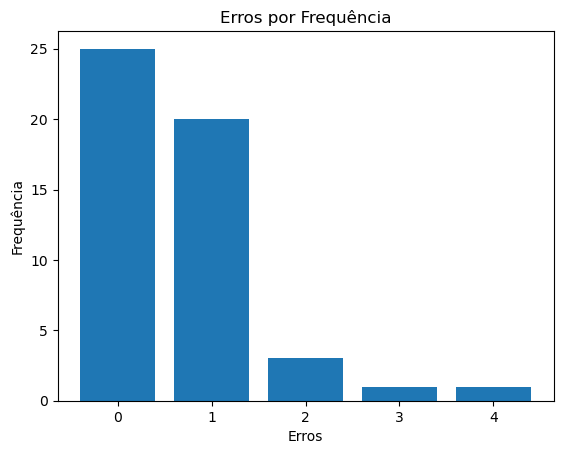

In [10]:
plt.bar(freq_table['Erros'], freq_table['Frequencia'])
plt.xlabel('Erros')
plt.ylabel('Frequência')
plt.title('Erros por Frequência')
plt.show()


#### Se o livro tem 500 páginas, qual o número total de erros esperado no livro?

In [11]:
valor = media * 500
print('O valor esperado é: ', valor)

O valor esperado é:  330.0


### Problema 2: As taxas de juros recebidas por 10 ações durante um certo período foram (medidas em porcentagem) 2,59; 2,64; 2,60; 2,62; 2,57; 2,55; 2,61; 2,50; 2,63; 2,64. Calcule a média, a mediana e o desvio padrão.

In [12]:
dados = [2.59, 2.64, 2.60, 2.62, 2.57, 2.55, 2.61, 2.50, 2.63, 2.64]

In [13]:
dados = pd.DataFrame(dados, columns=['TaxasJuros'])
dados

,TaxasJuros
0,2.59
1,2.64
2,2.60
3,2.62
4,2.57
5,2.55
6,2.61
7,2.50
8,2.63
9,2.64


In [14]:
media = round(dados['TaxasJuros'].mean(), 2)
print('Media:', media)

mediana = round(dados['TaxasJuros'].median(), 2)
print('Mediana:', mediana)

desvioPadrao = round(dados['TaxasJuros'].std(), 2)
print("Desvio Padrão:", desvioPadrao)

Media: 2.6
Mediana: 2.6
Desvio Padrão: 0.04


### Problema 3: Para facilitar um projeto de ampliação da rede de esgoto de uma certa região de uma cidade, as autoridades tomaram uma amostra de tamanho 50 dos 270 quarteirões que compõem a região, e foram encontrados os seguintes números de casas por quarteirão:
                                 2  2  3 10 13 14 15 15 16 16
                                18 18 20 21 22 22 23 24 25 25
                                26 27 29 29 30 32 36 42 44 45
                                45 46 48 52 58 59 61 61 61 65
                                66 66 68 75 78 80 89 90 92 97

In [15]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]

#### Use cinco intervalos e construa um histograma.

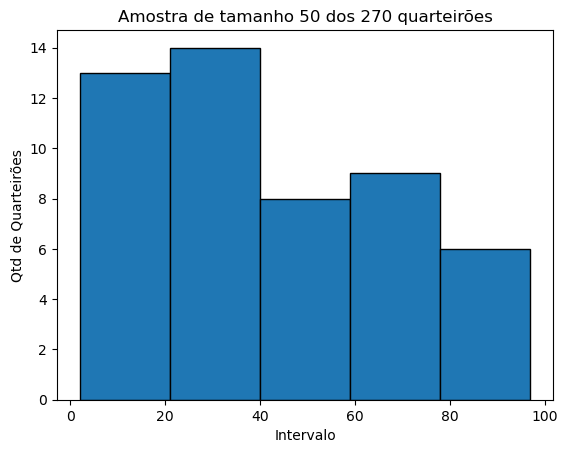

In [16]:
plt.hist(dados, bins=5, edgecolor='black')

plt.xlabel('Intervalo')
plt.ylabel('Qtd de Quarteirões')
plt.title('Amostra de tamanho 50 dos 270 quarteirões')


plt.show()


#### Determine uma medida de posição central e uma medida de dispersão.

In [17]:
#Utilizando Numpy

print('Medida de posição central')
mediana = np.median(dados)
print('Mediana:', mediana)

print()

print('medida de dispersão')
desvioPadrao = round(np.std(dados),2)
print('Desvio Padrão:', desvioPadrao)

Medida de posição central
Mediana: 31.0

medida de dispersão
Desvio Padrão: 25.81


### Problema 6: Numa pesquisa realizada com 100 famílias, levantaram-se as seguintes informações:

In [44]:
numeroFilhos = [0, 1, 2, 3, 4, 5, '+ q 5']
freqFamilia = [17, 20, 28, 19, 7, 4, 5]

pesquisa = pd.DataFrame(numeroFilhos, columns=['NumeroFilhos'])
pesquisa['FreqFamilia'] = freqFamilia

pesquisa

,NumeroFilhos,FreqFamilia
0,0,17
1,1,20
2,2,28
3,3,19
4,4,7
5,5,4
6,+ q 5,5


In [45]:
#Mudando elemento da lista
numeroFilhos = [6 if x == '+ q 5' else x for x in numeroFilhos]

familias = []

for numeroFilhos, freqFamilia in zip(numeroFilhos, freqFamilia):
    familias.extend([numeroFilhos] * freqFamilia)

In [47]:
len(familias)

100

#### Qual a mediana do número de filhos?

In [48]:
mediana = np.median(familias)

print("A mediana é:", mediana)

A mediana é: 2.0


#### E a moda?

In [50]:
# Apenas de olhar tabela é possivel identificar que é a quantidade de 2 filhos que mais acontece.
pesquisa

,NumeroFilhos,FreqFamilia
0,0,17
1,1,20
2,2,28
3,3,19
4,4,7
5,5,4
6,+ q 5,5


In [53]:
# Apenas para registrar outra maneira
moda = np.argmax(np.bincount(familias))

print("A moda é:", moda)

A moda é: 2


### Problema 7: Obtenha o esquema dos cinco números para os dados do Problema 3. Calcule o intervalo interquartil e as dispersões inferior e superior. Baseado nessas medidas, verifique se a forma da distribuição dos dados é normal.

In [54]:
dados = [2, 2, 3, 10, 13, 14, 15, 15, 16, 16, 18, 18, 20, 21, 22, 22, 23, 24, 25, 25, 26, 27, 29, 29, 30, 32, 36, 42, 44,
         45, 45, 46, 48, 52, 58, 59, 61, 61, 61, 65, 66, 66, 68, 75, 78, 80, 89, 90, 92, 97]